<a href="https://colab.research.google.com/github/D1emonk/My-repo/blob/main/Lesson_32.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Архитектуры для Object Detection

<h2> YOLO (You Only Look Once)

YOLO (You Only Look Once) — это алгоритм для обнаружения объектов в реальном времени, разработанный в 2015 году Джозефом Редмоном и Али Фархади. Его ключевое отличие — однопроходная (single-shot) обработка изображения, благодаря чему алгоритм быстро и эффективно определяет объекты и их местоположение на изображении

<h3> Как работает

1. Разбиение изображения на сетку: Входное изображение делится на сетку размером S×S (например, 3×3). Каждая ячейка сетки отвечает за обнаружение объектов, центр которых попадает в эту ячейку.

2. Предсказание ограничивающих рамок: Каждая ячейка предсказывает B ограничивающих рамок (bounding boxes). Для каждой рамки вычисляются координаты центра (x, y), ширина (w), высота (h) и коэффициент уверенности (confidence score), который отражает вероятность наличия объекта и точность предсказания рамки.

3. Классификация объектов: Каждая ячейка также предсказывает вероятности принадлежности объекта к классам (class probabilities), условно заданные при наличии объекта в рамке.

4. Объединение результатов: На этапе тестирования для каждой рамки вычисляется итоговая вероятность класса как произведение confidence score на class probability. Затем применяется фильтрация по порогу и алгоритм Non-Maximum Suppression (NMS), который удаляет пересекающиеся и дублирующие рамки, оставляя наиболее уверенные.

5. Архитектура сети: YOLO использует сверточную нейронную сеть (например, Darknet), которая преобразует изображение в признаки, а затем предсказывает bounding boxes и классы за один проход. В новых версиях YOLO добавляются компоненты, такие как Feature Pyramid Network (FPN) и Path Aggregation Network (PANet), для улучшения обнаружения объектов разных размеров.

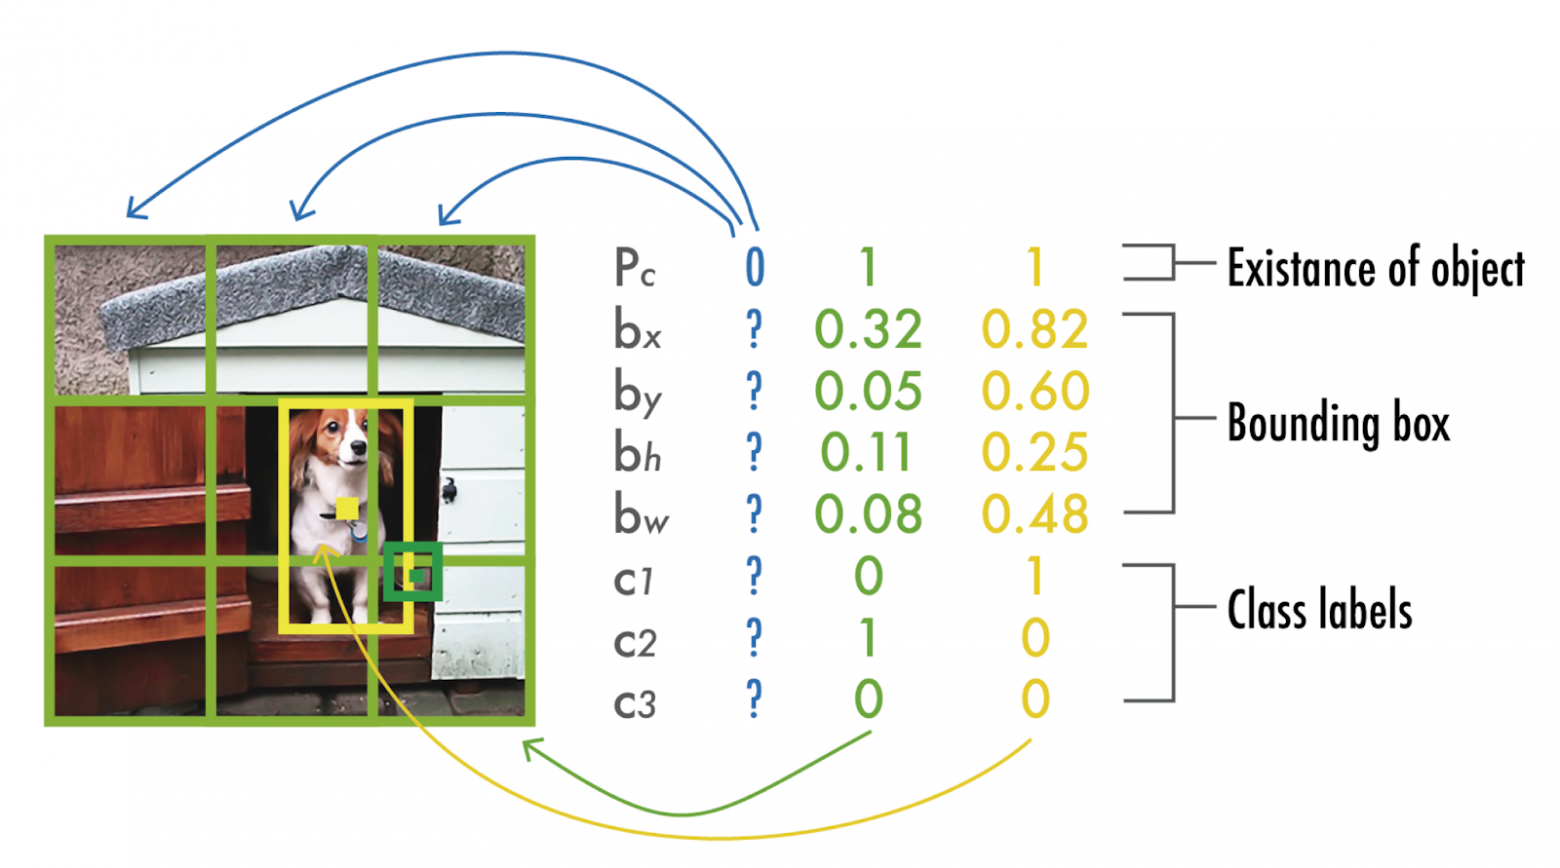

<h3> Преимущества YOLO

1. Высокая скорость: Однопроходная архитектура позволяет обрабатывать изображения в реальном времени (до 45–155 кадров в секунду), что важно для приложений видеонаблюдения и автономного вождения.

2. Хорошая точность: YOLO достигает высокой точности благодаря обучению на большом количестве данных и использованию современных архитектур CNN.

3. Обнаружение мелких объектов: Благодаря сеточному подходу YOLO хорошо справляется с маленькими объектами.

4. Эффективное использование ресурсов: Полностью сверточная архитектура хорошо оптимизирована для работы на GPU.

<h3> Итог

YOLO — это революционный алгоритм обнаружения объектов, который за один проход нейросети одновременно предсказывает местоположение и класс объектов на изображении. Его высокая скорость и точность сделали его одним из самых популярных методов для задач реального времени, таких как видеонаблюдение, автономное вождение и робототехника

<h2> Faster R-CNN

Faster R-CNN — это двухступенчатый алгоритм обнаружения объектов, разработанный в 2015 году, который значительно повысил эффективность и точность по сравнению с предыдущими моделями R-CNN и Fast R-CNN

<h3> Основные компоненты Faster R-CNN

1. Backbone-сеть (Feature Extractor)
Обычно это предобученная сверточная нейросеть (например, ResNet или VGG), которая преобразует входное изображение в компактную карту признаков (feature map). Эта карта содержит высокоуровневую информацию о визуальных объектах на изображении.

2. Region Proposal Network (RPN)
Это ключевой компонент Faster R-CNN, который заменил традиционные методы генерации регионов (например, Selective Search) на полностью сверточную сеть. RPN скользит по feature map и в каждой позиции предсказывает несколько anchor boxes (предварительно заданных ограничивающих рамок разных размеров и аспектов). Для каждого anchor RPN вычисляет:

   - вероятность наличия объекта (objectness score)

   - уточнённые координаты рамки (bounding box regression)
Это позволяет эффективно и быстро генерировать качественные предложения регионов, где могут находиться объекты.

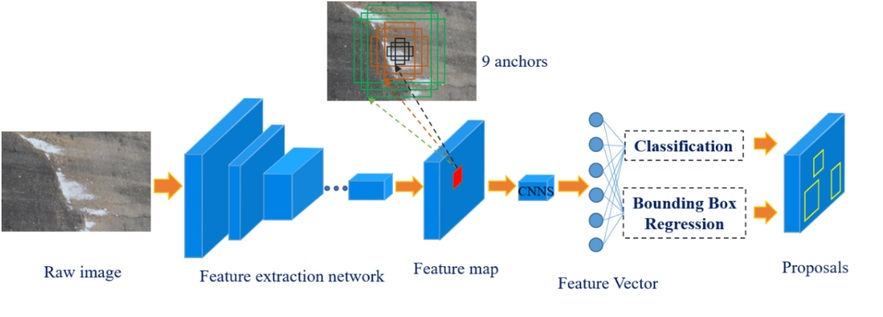

3. RoI Pooling (Region of Interest Pooling)
Поскольку предложения регионов имеют разный размер, RoI Pooling преобразует каждую предложенную область в фиксированный размер (например, 7×7), что позволяет подавать их на последующие полносвязные слои. Это обеспечивает обработку регионов разного масштаба и формы в единой сети.

4. Классификация и регрессия bounding box
После RoI Pooling полученные фиксированные признаки подаются в два параллельных слоя:

   - Классификатор, который определяет класс объекта (с помощью softmax)

  - Регрессор, который уточняет координаты ограничивающей рамки для каждого класса
Обучение происходит с использованием комбинированной функции потерь: кросс-энтропия для классификации и smooth L1 loss для регрессии.

<h3> Как работает Faster R-CNN

Изображение проходит через backbone-сеть, формируя feature map.

RPN скользит по feature map, генерируя предложения регионов с оценками вероятности объектов.

Предложения регионов передаются в RoI Pooling, где приводятся к фиксированному размеру.

Далее признаки каждого региона классифицируются и уточняются координаты рамок.

На выходе получаем классы объектов и их точные bounding boxes.

<h3> Преимущества Faster R-CNN

Энд-то-энд обучение: RPN и детектор обучаются совместно, что повышает согласованность и качество предложений регионов.

Высокая точность: благодаря глубокому извлечению признаков и точной генерации регионов модель хорошо справляется с обнаружением сложных и мелких объектов.

Быстрее предшественников: замена Selective Search на RPN значительно ускорила процесс генерации регионов.

<h3> Улучшения и расширения

Feature Pyramid Network (FPN): добавляет многомасштабное представление признаков для лучшего обнаружения объектов разных размеров.

Mask R-CNN: расширяет Faster R-CNN, добавляя сегментацию объектов (instance segmentation) с помощью дополнительной ветви для масок.

Cascade R-CNN: использует последовательность детекторов с возрастающими порогами IoU для повышения точности локализации.

<h3> Итог

Faster R-CNN — это двухступенчатая архитектура, объединяющая глубокое извлечение признаков, эффективную генерацию регионов через Region Proposal Network и точную классификацию с регрессией ограничивающих рамок. Эта модель стала базовой для многих современных систем обнаружения объектов благодаря балансу между скоростью и точностью, а также гибкости для дальнейших улучшений.

<h2> SSD (Single Shot MultiBox Detector)

SSD (Single Shot MultiBox Detector) — это одноступенчатый алгоритм обнаружения объектов, который выполняет локализацию и классификацию объектов за один проход нейросети, без необходимости генерации регионов предложений (region proposals), что обеспечивает высокую скорость работы при сохранении хорошей точности.

<h3> Как работает SSD

Архитектура:
SSD базируется на сверточной нейронной сети (например, модифицированной VGG16), в которой полностью связанные слои удалены и добавлены дополнительные сверточные слои для извлечения признаков на разных масштабах. Это позволяет эффективно обнаруживать объекты разных размеров.

Default boxes (якорные рамки):
На каждом уровне выходных признаков (feature map) SSD задаёт набор предопределённых ограничивающих рамок (default boxes) с разными соотношениями сторон и масштабами. Для каждой такой рамки сеть предсказывает:

вероятность принадлежности к каждому классу объекта

корректировки координат рамки (регрессия bounding box), чтобы лучше соответствовать форме объекта.

Мульти-масштабное обнаружение:
SSD использует несколько уровней признаков с разным разрешением для детекции объектов разных размеров: более мелкие объекты обнаруживаются на слоях с высоким разрешением (более ранних), а крупные — на слоях с низким разрешением (глубже в сети).

Обучение:
Используется комбинированная функция потерь, включающая:

Confidence loss (кросс-энтропия) — для классификации объектов в default boxes

Location loss (обычно smooth L1 loss) — для регрессии координат bounding boxes
Итоговая функция:

multibox_loss = confidence_loss + alpha * location_loss

где α — коэффициент балансировки.

Предсказание:
На этапе инференса SSD генерирует множество предсказаний bounding boxes с вероятностями классов, после чего применяется Non-Maximum Suppression (NMS) для удаления дублирующих и пересекающихся рамок.

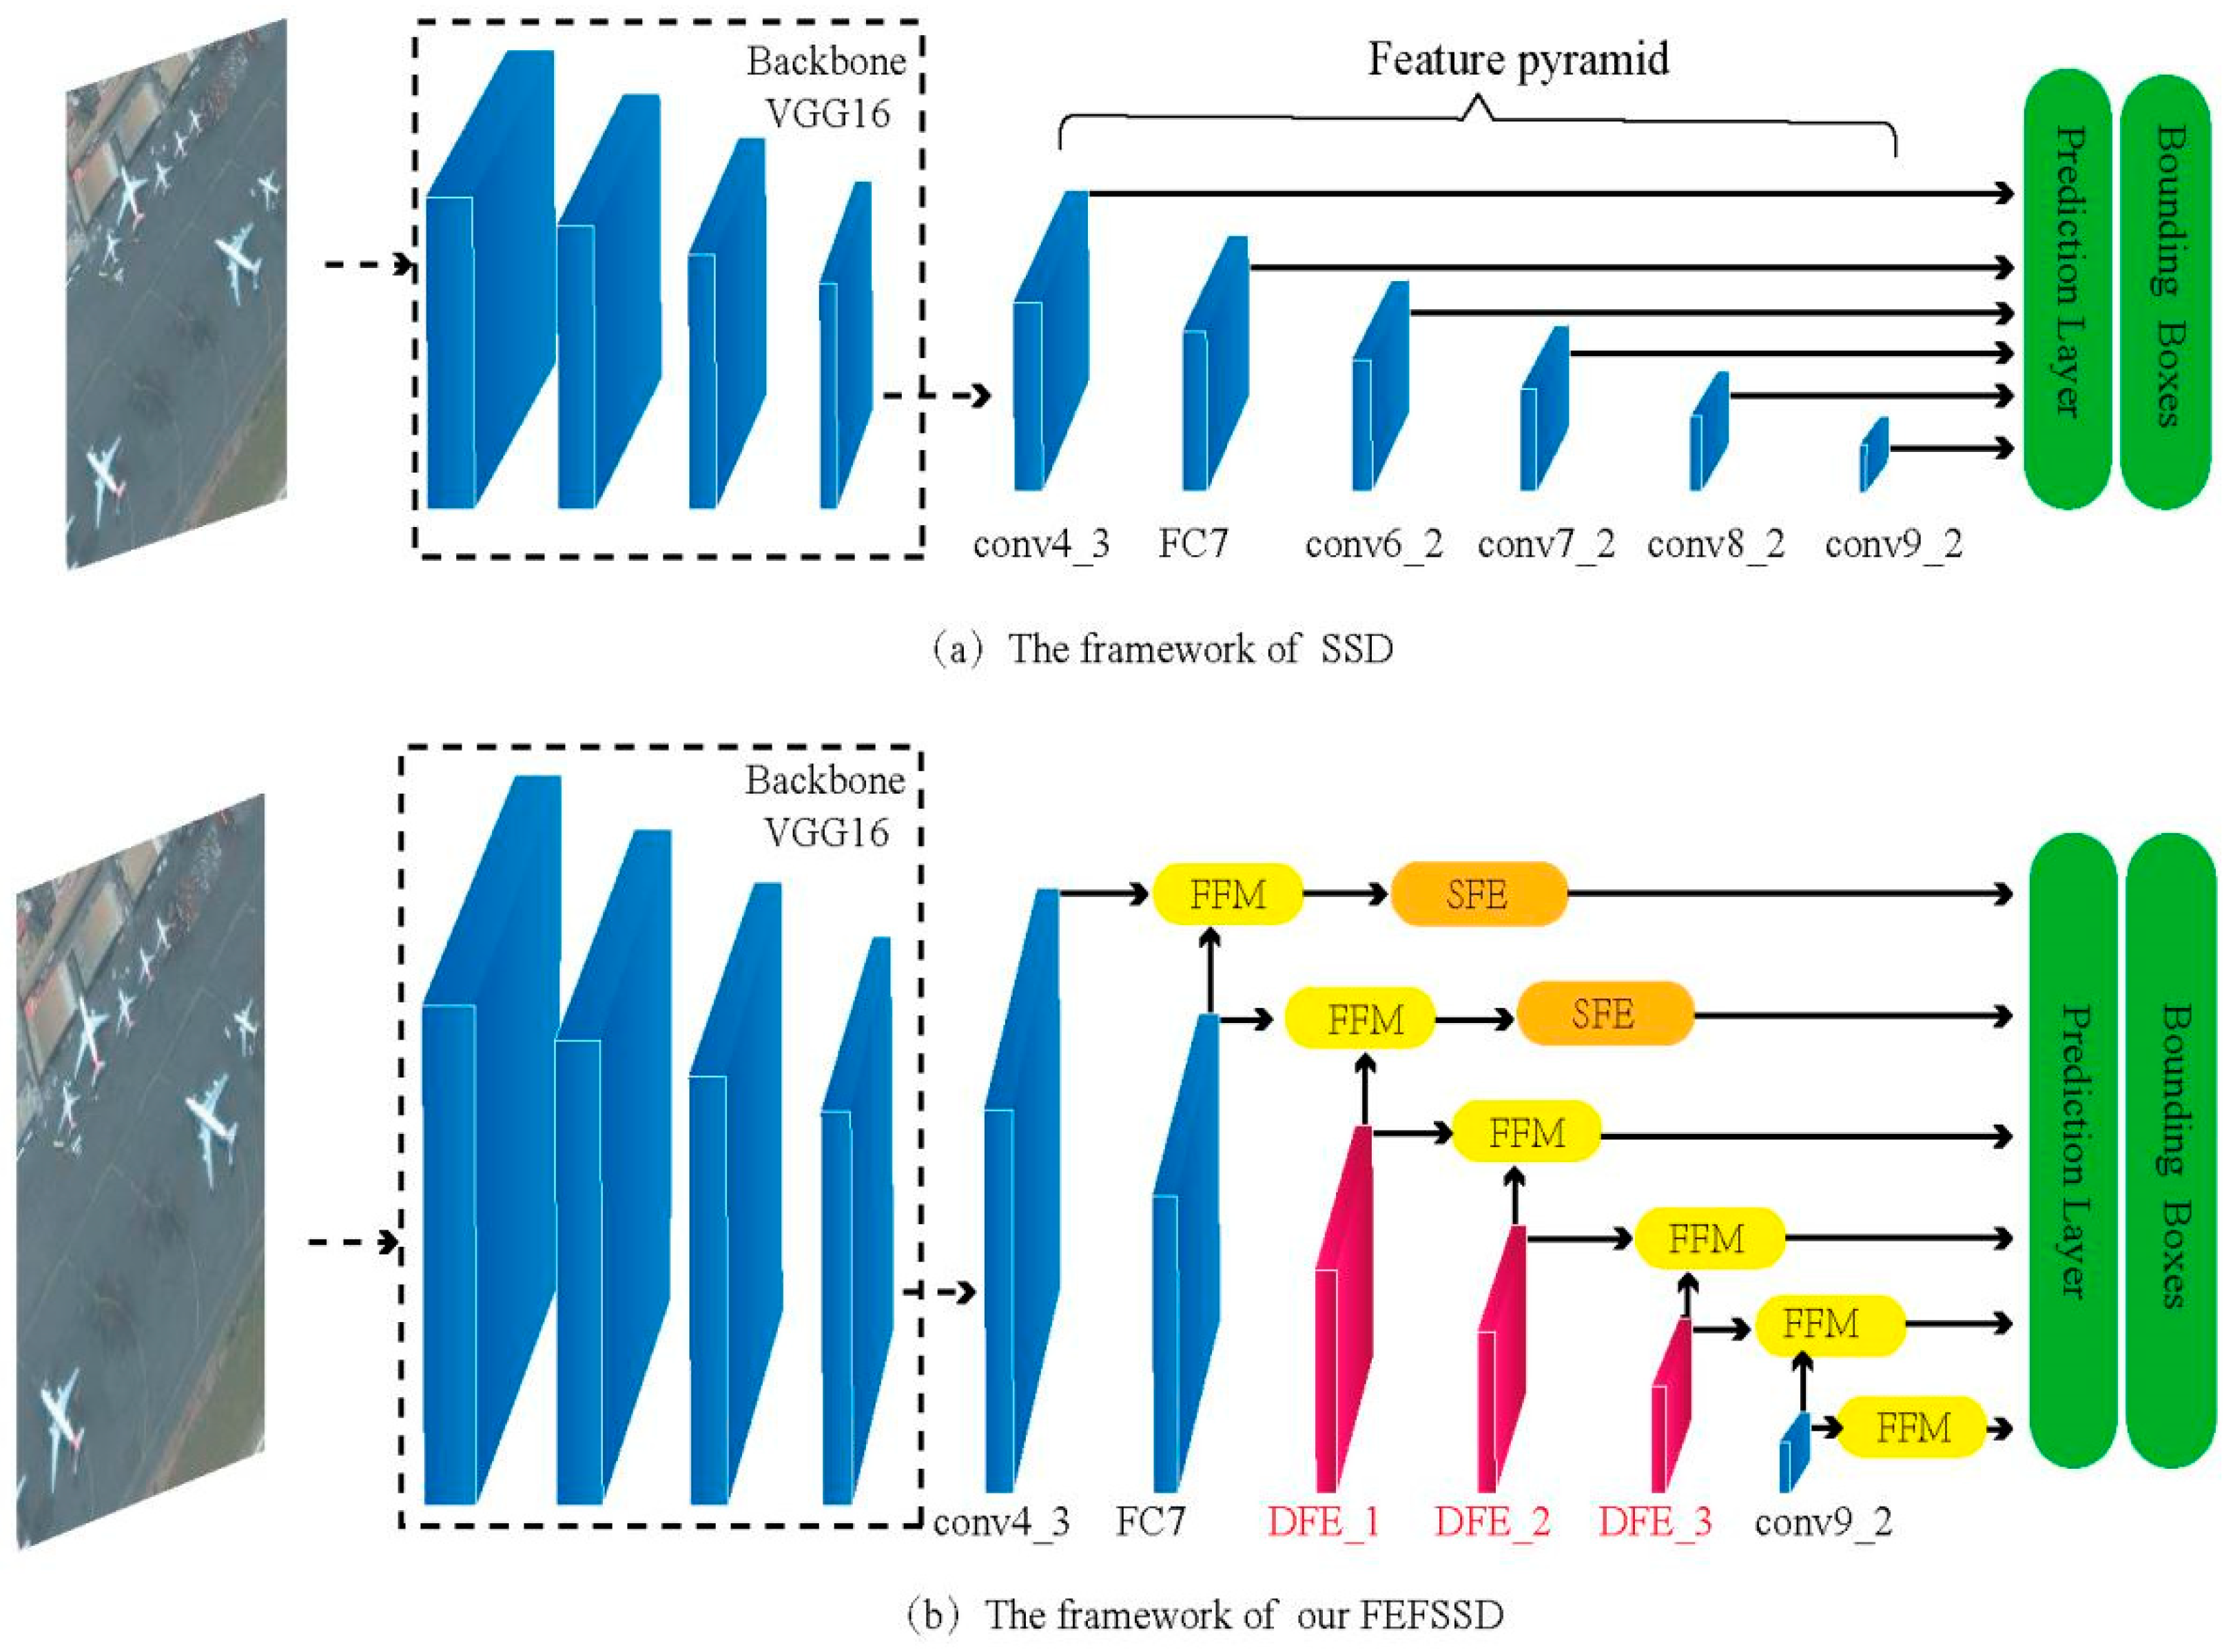

<h3> Преимущества SSD

- Высокая скорость:
Однопроходная архитектура без этапа генерации предложений регионов обеспечивает скорость до 59 кадров в секунду (FPS) на стандартных GPU с разрешением 300×300.

- Хорошая точность:
SSD достигает сопоставимой или даже лучшей точности по сравнению с двухступенчатыми методами, такими как Faster R-CNN, особенно при использовании более высокого разрешения входных изображений (например, SSD512).

- Обнаружение объектов разных размеров:
Мульти-масштабный подход с использованием нескольких уровней признаков позволяет эффективно обнаруживать как мелкие, так и крупные объекты.

- Простота интеграции:
SSD легко обучать и интегрировать в различные системы благодаря единой нейросети и отсутствию сложных этапов генерации регионов.

<h3> Итог

SSD — это эффективный и быстрый метод обнаружения объектов, который использует однопроходную архитектуру с предопределёнными якорными рамками на разных уровнях признаков для мульти-масштабного детектирования. Он сочетает высокую скорость и хорошую точность, что делает его популярным выбором для приложений реального времени и систем с ограниченными вычислительными ресурсами.

<h2> CenterNet

CenterNet — это современный одноэтапный (one-stage) метод обнаружения объектов, который представляет объекты на изображении как ключевые точки, а именно — как центры ограничивающих рамок (bounding boxes). В отличие от классических подходов с использованием anchor boxes (например, YOLO или SSD) или пар углов (CornerNet), CenterNet фокусируется на предсказании центра объекта и регрессии размеров рамки вокруг него.

<h3> Как работает CenterNet

Предсказание тепловых карт (heatmaps):
Сеть генерирует тепловую карту, где каждый пиксель отражает вероятность присутствия центра объекта определённого класса. Пики на этой карте соответствуют центрам объектов.

Регрессия размеров и смещений:
Для каждого обнаруженного центра сеть предсказывает ширину и высоту bounding box, а также небольшие смещения (offsets), чтобы повысить точность локализации.

Эмбеддинги для связывания углов (в модификациях):
В архитектуре, основанной на CornerNet, объекты детектируются по парам ключевых точек — левому верхнему и правому нижнему углам рамки. CenterNet улучшает этот подход, добавляя предсказание центра рамки и эмбеддинги, которые помогают связать углы в одну рамку и уменьшить количество ложных срабатываний.

Механизмы pooling:
Для повышения качества определения ключевых точек используются специальные операции, такие как corner pooling (для углов) и center pooling (для центра).

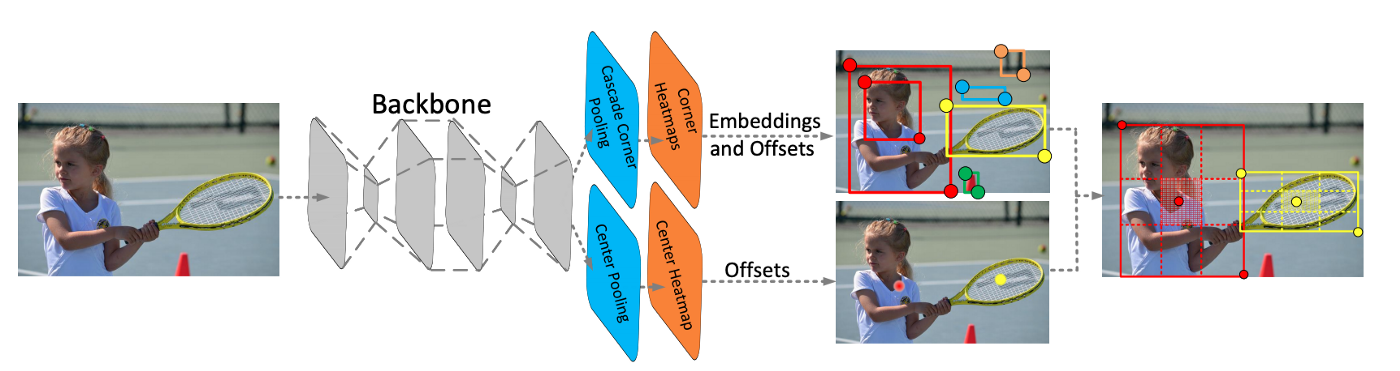

<h3> Преимущества CenterNet

Упрощение задачи: вместо предсказания множества anchor boxes, модель ищет ключевые точки, что снижает сложность и количество гиперпараметров.

Высокая точность: добавление предсказания центра рамки помогает уменьшить ложные срабатывания, характерные для CornerNet.

Гибкость: CenterNet может расширяться для решения задач оценки позы, 3D-детекции и других связанных задач.

Лёгкость и скорость: CenterNet и его облегчённые версии (например, CornerNet-Lite) подходят для реального времени и устройств с ограниченными ресурсами.

<h3> Другие ключевые методы, связанные с CenterNet

CornerNet: обнаруживает объекты как пары ключевых точек — верхний левый и нижний правый углы bounding box, используя механизм corner pooling.

CornerNet-Lite: облегчённая версия CornerNet, оптимизированная для скорости и использования в реальном времени.

CenterTrack: расширение CenterNet для одновременного обнаружения и отслеживания объектов в видео.

<h3> Итог

CenterNet и связанные с ним методы меняют традиционный подход к обнаружению объектов, рассматривая объекты как набор ключевых точек (центры и углы), что упрощает архитектуру и повышает точность. Это позволяет создавать быстрые и точные модели, применимые как в реальном времени, так и в задачах, требующих высокой детализации.

<h2> Fast R-CNN

Fast R-CNN — это алгоритм обнаружения объектов, разработанный Россом Гиршиком в 2015 году, который значительно ускоряет и улучшает по точности классический R-CNN. Он решает проблему высокой вычислительной нагрузки и медленного обучения, характерных для R-CNN, за счёт более эффективной обработки изображений и регионов интереса.

<h3> Как работает Fast R-CNN

1. Обработка всего изображения целиком:
В отличие от R-CNN, который для каждого региона интереса (region proposal) отдельно вырезает и масштабирует область из исходного изображения, Fast R-CNN пропускает всё изображение один раз через сверточную нейросеть (CNN), получая карту признаков (feature map). Это позволяет значительно сэкономить время и ресурсы.

2. ROI Pooling (Region of Interest Pooling):
Для каждого предложенного региона интереса (region proposal), который задаётся внешним алгоритмом (например, Selective Search), из общей feature map извлекается фиксированного размера вектор признаков с помощью слоя ROI Pooling. Этот слой разбивает регион на сетку (например, 7×7) и применяет max pooling к каждой ячейке, обеспечивая одинаковый размер выходного вектора независимо от размера региона.

3. Классификация и регрессия:
Полученный вектор признаков передаётся в полносвязные слои, которые разделяются на две ветви:

 - Классификатор, предсказывающий вероятность принадлежности региона к каждому классу (включая фон).

 - Регрессор, уточняющий координаты bounding box для каждого класса.

4. Обучение:
Fast R-CNN обучается с помощью комбинированной функции потерь, включающей кросс-энтропию для классификации и smooth L1 loss для регрессии координат рамок.

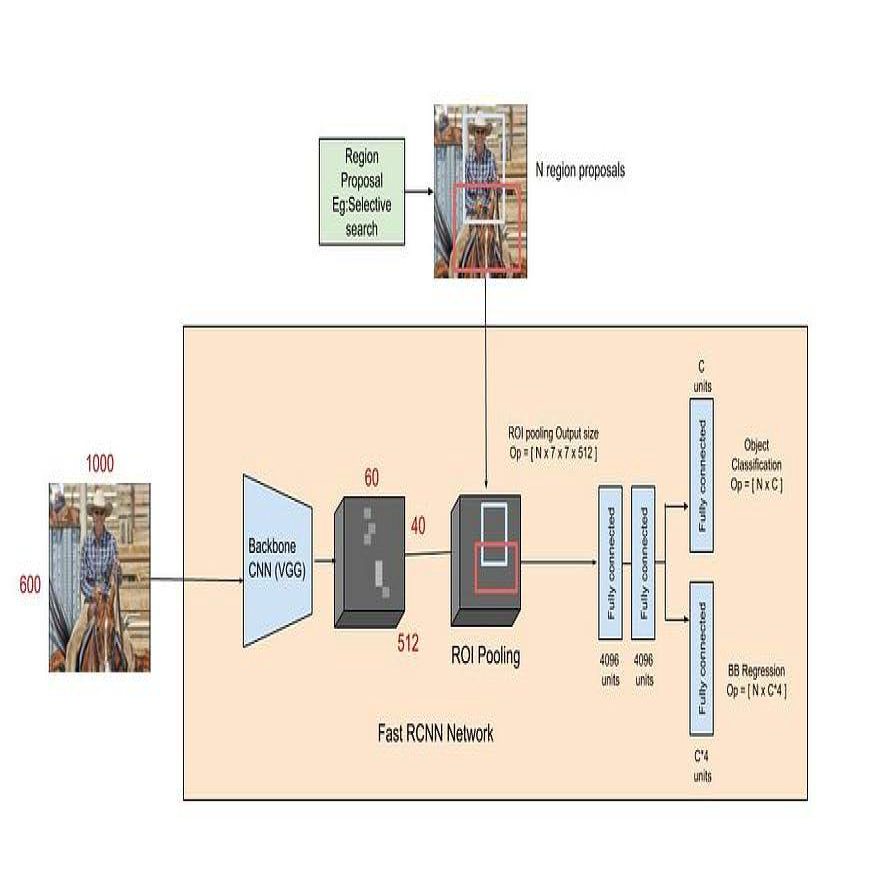

<h3> Преимущества Fast R-CNN по сравнению с R-CNN

1. Скорость:
Благодаря однократной обработке изображения и совместному использованию признаков для всех регионов, Fast R-CNN работает в сотни раз быстрее R-CNN как на обучении, так и на тестировании.

2. Точность:
Улучшенная архитектура и совместное обучение всех компонентов повышают точность обнаружения.

3. Удобство обучения:
В отличие от R-CNN, Fast R-CNN обучается end-to-end, без необходимости сохранять промежуточные данные и обучать несколько отдельных моделей.

<h3> Ограничения Fast R-CNN

Fast R-CNN всё ещё зависит от внешнего алгоритма генерации регионов (например, Selective Search), который является узким местом по скорости и не обучается совместно с сетью.

<h3> Связь с Faster R-CNN

Faster R-CNN решает проблему генерации регионов, интегрируя Region Proposal Network (RPN) внутрь сети, что делает систему полностью end-to-end и ещё быстрее. Fast R-CNN можно считать промежуточным этапом между R-CNN и Faster R-CNN.

<h3> Итог

Fast R-CNN — это эффективный метод обнаружения объектов, который обрабатывает изображение целиком, используя ROI Pooling для извлечения признаков из предложенных регионов, и одновременно классифицирует и уточняет координаты объектов. Он значительно быстрее и точнее классического R-CNN, но всё ещё зависит от внешних алгоритмов генерации регионов, что позже было устранено в Faster R-CNN.

<h2> HOG (Histogram of Oriented Gradients)

Гистограмма направленных градиентов (HOG, Histogram of Oriented Gradients) — это дескриптор признаков, широко используемый в компьютерном зрении и обработке изображений для задачи обнаружения объектов.

<h3> Основная идея HOG

 HOG описывает локальный внешний вид и форму объекта через распределение направлений градиентов яркости или краёв в небольших областях изображения. Изображение разбивается на маленькие связанные регионы — ячейки (cells), и для каждой ячейки строится гистограмма направлений градиентов. Затем гистограммы всех ячеек объединяются в один вектор признаков.

Для повышения устойчивости к изменениям освещения и контраста гистограммы нормализуются в более крупных областях — блоках (blocks), которые включают несколько соседних ячеек.

<h3> Как вычисляется HOG

Вычисление градиентов:
Для каждого пикселя вычисляются производные яркости по горизонтали и вертикали (например, с помощью фильтров [−1,0,1] и их транспонированных версий). Результатом являются величина и направление градиента.

Формирование гистограмм в ячейках:
В каждой ячейке (обычно 8×8 пикселей) для каждого пикселя накапливается вклад в гистограмму направлений градиента. Диапазон направлений делится на несколько бинов (обычно 9), и вклад каждого пикселя пропорционален величине градиента.

Нормализация в блоках:
Несколько соседних ячеек объединяются в блок (например, 2×2 ячейки), и гистограммы нормализуются, что снижает влияние изменений освещения и теней.

Формирование итогового дескриптора:
Нормализованные гистограммы всех блоков конкатенируются в один длинный вектор признаков, который описывает изображение или его часть.

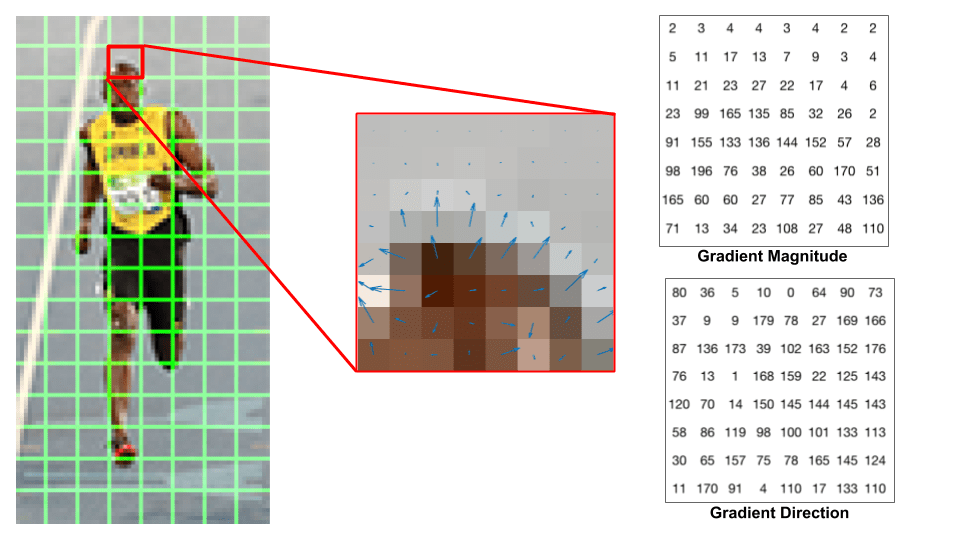

 <h3> Преимущества HOG

Устойчивость к геометрическим и фотометрическим изменениям (кроме ориентации объекта).

Хорошо подходит для обнаружения объектов с устойчивой формой, например, пешеходов.

Относительно прост в реализации и вычислении.

<h3> Применение

HOG часто используется в сочетании с классическими методами классификации, например, с линейным SVM, для построения детекторов объектов (например, пешеходов). Алгоритм хорошо показал себя на задачах распознавания людей и других объектов с характерной формой.

Таким образом, HOG — это мощный и проверенный временем дескриптор, основанный на анализе направленных градиентов в локальных областях изображения, который помогает эффективно описывать и обнаруживать объекты.

<h2> ThunderNet

ThunderNet — это лёгкая двухступенчатая модель обнаружения объектов, специально разработанная для работы в реальном времени на мобильных и вычислительно ограниченных устройствах. Она сочетает высокую точность двухступенчатых детекторов с эффективностью, необходимой для мобильных платформ.

<h3> Основные особенности ThunderNet

Двухступенчатая архитектура:
ThunderNet использует подход двухступенчатого детектора, где сначала генерируются предложения регионов (Region Proposal Network, RPN), а затем эти регионы классифицируются и уточняются. В отличие от традиционных тяжёлых двухступенчатых моделей, ThunderNet значительно упрощает и сжимает RPN и подсеть классификации (R-CNN subnet), снижая вычислительные затраты.

Лёгкий бэкенд (backbone) — SNet:
В основе ThunderNet лежит специально разработанная лёгкая сверточная сеть SNet, вдохновлённая ShuffleNetV2, оптимизированная для задач обнаружения объектов. SNet учитывает особенности детекции, обеспечивая баланс между эффективностью и качеством извлечения признаков.

Context Enhancement Module (CEM):
Этот модуль объединяет карты признаков с разных масштабов, чтобы эффективно использовать как локальный, так и глобальный контекст изображения. Это помогает компенсировать потерю информации из-за малых размеров признаков и облегчённого бэкенда.

Spatial Attention Module (SAM):
SAM использует информацию, полученную в RPN, для перераспределения весов признаков перед этапом RoI warping (выравнивания регионов интереса). Это усиливает признаки, относящиеся к объектам, и подавляет фон, улучшая качество детекции и стабилизируя обучение.

Баланс между разрешением входного изображения, бэкендом и головой детектора:
Авторы ThunderNet тщательно исследовали, как оптимально подобрать размер входного изображения, архитектуру бэкенда и структуру детектора, чтобы достичь максимальной эффективности при ограниченных ресурсах.

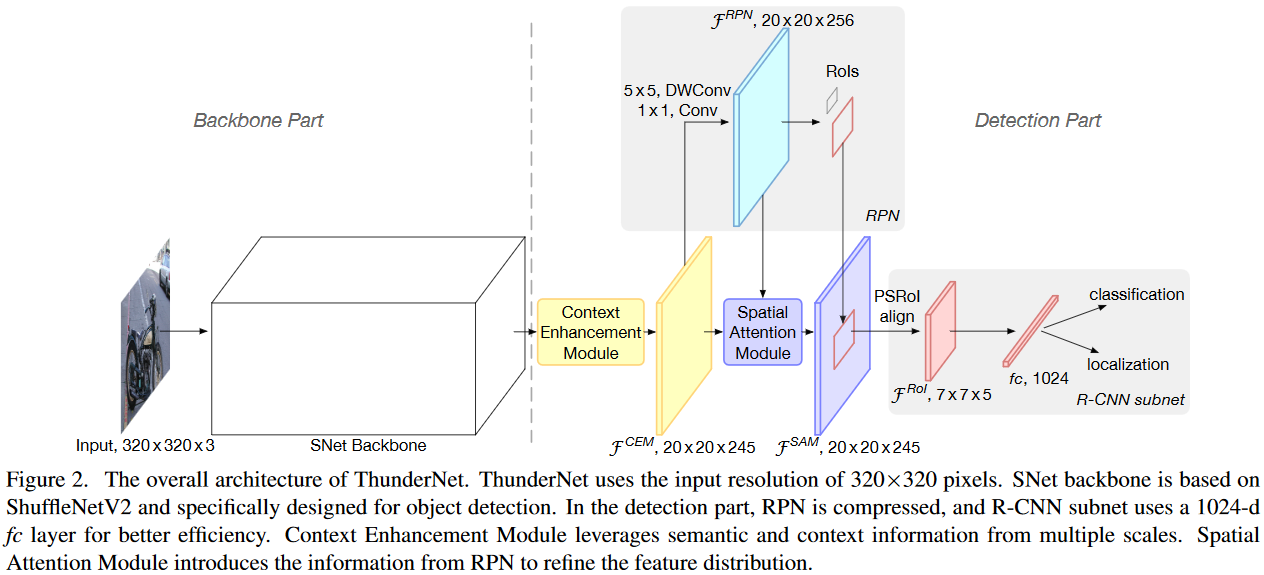

<h3> Результаты и производительность

ThunderNet достигает сопоставимой или лучшей точности по сравнению с лёгкими одноступенчатыми детекторами при значительно меньших вычислительных затратах (около 40% от затрат конкурентов) на популярных датасетах PASCAL VOC и COCO.

Модель способна работать в реальном времени (около 24 кадров в секунду) на ARM-устройствах, что является значительным достижением для двухступенчатых детекторов на мобильных платформах.

<h3> Итог

ThunderNet — это эффективный и компактный двухступенчатый детектор объектов, оптимизированный для мобильных устройств. Он сочетает лёгкий backbone (SNet), инновационные модули контекстного усиления и пространственного внимания (CEM и SAM), а также упрощённые RPN и классификационную подсеть, что позволяет достигать высокого качества обнаружения при низких вычислительных затратах и реальном времени работы на мобильных платформах.

<h1> Сравнение архитектур

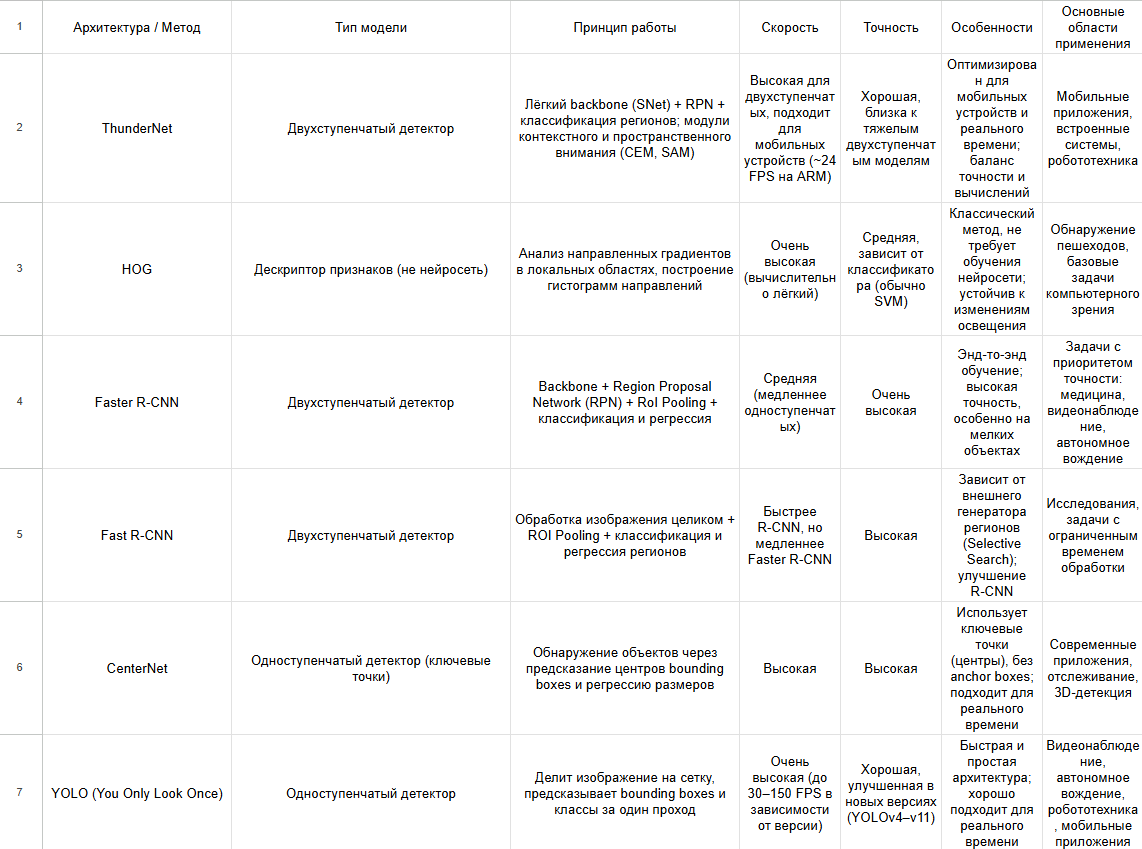